#假设我们总体中有一部分女生，一部分男生，我们想知道他们的比例是否大体相当。那么我们采用bootstrap的步骤则是：

    ##每次采样10个人，看男女比例。
    ##重复上述过程10000次，把每次的男女比例求平均，代表最终的男女比例。

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.utils import resample  

def scalegirl(samples):
    '''
    统计抽样结果中：女性/男性比例
    '''
    count =0.0
    total = samples.size
    for sex in samples:
        if(sex==0):
            count+=1.0
#     print(count)
    return count/(total-count)
 
boy = (np.ones(1000))
girl = (np.zeros(800))
#girl/boy=0.8
 
# print(girl.shape)
all = np.hstack((boy, girl))
scale = 0.0
iter = 10000
for i in range(iter):
    bootstrapSamples = resample(all,n_samples=100,replace=1)
#     print(bootstrapSamples)
    tempscale = scalegirl(bootstrapSamples) # 比例—女性：男性
#     print(tempscale)
    scale+=tempscale
print(scale/iter) # 计算10000次的平均 女/男


# Beta分布

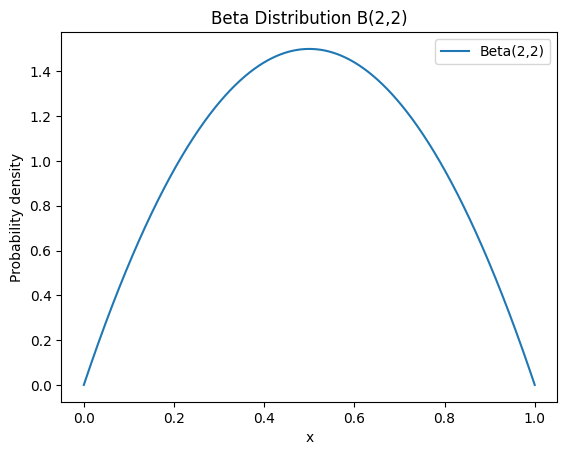

In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# 定义参数
a, b = 2, 2

# 生成x值
x = np.linspace(0, 1, 1000)

# 计算Beta分布的概率密度函数（pdf）
y = beta.pdf(x, a, b)

# 绘制图形
plt.plot(x, y, label='Beta(2,2)')
plt.title('Beta Distribution B(2,2)')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.show()

# 最大后验估计(MAP)

In [5]:
import numpy as np
from scipy.stats import norm

# 生成一些模拟数据
np.random.seed(0)
data = np.random.normal(loc=2, scale=1, size=100)  # 真实均值为2，标准差为1

# 定义似然函数和先验分布
def likelihood(mu, data):
    return np.prod(norm.pdf(data, mu, 1))

def prior(mu):
    return norm.pdf(mu, 0, 1)

# 计算后验概率
def posterior(mu, data):
    return likelihood(mu, data) * prior(mu)

# 通过数值方法找到使后验概率最大化的mu
mus = np.linspace(-1, 5, 1000)
posterior_probs = [posterior(mu, data) for mu in mus]
map_estimate = mus[np.argmax(posterior_probs)]

print("MAP Estimate of mu:", map_estimate)


MAP Estimate of mu: 2.039039039039039


# 似然函数

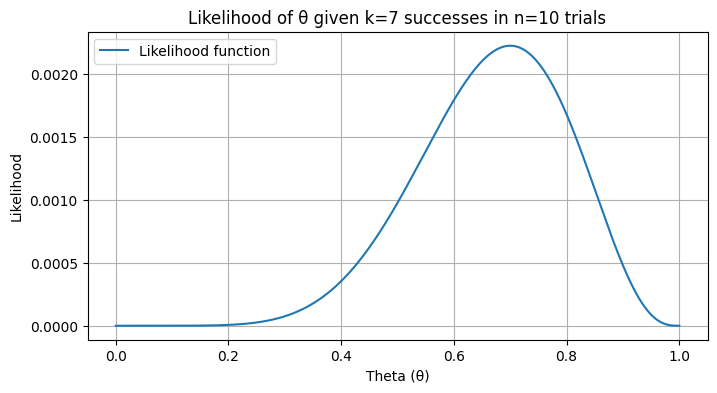

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定义似然函数
def likelihood(theta, k, n):
    """计算在给定θ时，观察到k次成功（在n次试验中）的概率"""
    return theta**k * (1-theta)**(n-k)

# 给定的试验结果
k = 7  # 成功次数
n = 10  # 总次数

# 生成θ的一系列可能值
theta_values = np.linspace(0, 1, 2000)

# 计算每个θ值的似然值
likelihoods = [likelihood(theta, k, n) for theta in theta_values]

# 绘制似然函数图
plt.figure(figsize=(8, 4))
plt.plot(theta_values, likelihoods, label='Likelihood function')
plt.xlabel('Theta (θ)')
plt.ylabel('Likelihood')
plt.title('Likelihood of θ given k=7 successes in n=10 trials')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
import numpy as np

def f(x):
    """ 目标函数 """
    return (x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
    """ 目标函数的梯度 """
    return np.array([2 * (x[0] - 1), 2 * (x[1] - 2)])

def dfp(f, grad_f, x0, tol=1e-5, max_iter=1000):
    """ DFP算法实现 """
    n = len(x0)
    x = x0
    H = np.eye(n)  # 初始化Hessian的逆近似为单位矩阵
    
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break

        # 计算搜索方向
        p = -np.dot(H, grad)
        
        # 线搜索找到合适的步长alpha
        alpha = 1
        while f(x + alpha * p) > f(x) + 0.1 * alpha * np.dot(grad, p):
            alpha *= 0.5
        
        # 更新x
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad
        
        # 更新Hessian的逆近似
        rho = 1.0 / np.dot(y, s)
        Hy = np.dot(H, y)
        H = H + rho * np.outer(s, s) - rho * np.outer(Hy, Hy)
        
        x = x_new

    return x

# 初始点
x0 = np.array([0.0, 0.0])
# 调用DFP算法
x_min = dfp(f, grad_f, x0)
print("找到的最小值点：", x_min)
print("在该点的函数值：", f(x_min))


找到的最小值点： [1. 2.]
在该点的函数值： 0.0
